<a href="https://colab.research.google.com/github/LiaLiz2000/Machine-Learning/blob/main/Shap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este ejercicio se enfoca en analizar la interpretabilidad de un modelo de aprendizaje automático utilizando los valores SHAP
(SHapleyAdditive exPlanations). SHAP es una herramienta poderosa para explicar la salida de los modelos de machine learning
al proporcionar interpretaciones tanto globales comolocales

In [1]:
import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
# Cargar el dataset
data = pd.read_csv("churn_data.csv")
print (data.head(10))

# Variable objetivo
X = data.drop(columns=["Churn", "customerID"])

y = data["Churn"]

# Dividir el conjunto
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convertir variables categóricas en numéricas (One-Hot Encoding)
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Asegurar que ambas tengan las mismas columnas
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Escalar datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Entrenar un modelo (Random Forest en este caso)
model = LogisticRegression()
model.fit(X_train_scaled, y_train)



FileNotFoundError: [Errno 2] No such file or directory: 'churn_data.csv'

In [ ]:
# Aplicar SHAP
explainer = shap.LinearExplainer(model, X_train_scaled)
shap_values = explainer.shap_values(X_test_scaled)

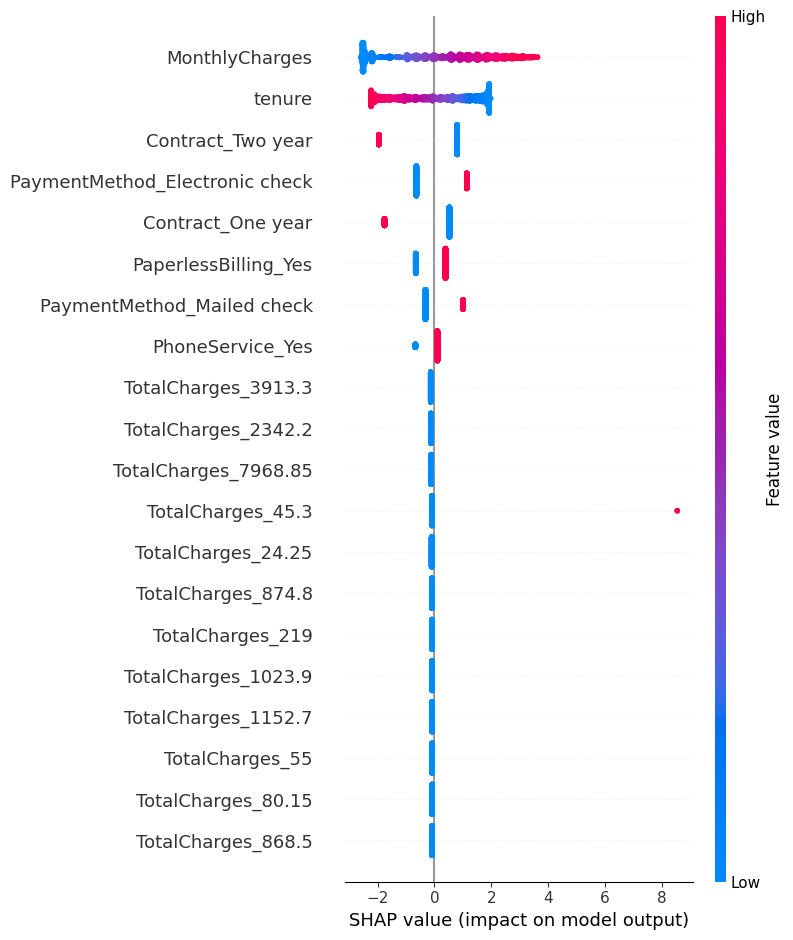

In [9]:
# Gráfico de resumen: Impacto de las características en la predicción
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns) # Use X_test.columns instead of X.columns

IndexError: list index out of range

In [8]:
# Gráfico de fuerza: Explicación de una predicción individual
shap.force_plot(explainer.expected_value[1], shap_values[1][0, :], X_test.iloc[0, :], matplotlib=True)
plt.show()

IndexError: invalid index to scalar variable.